In [ ]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
import gdown
import os
from tensorflow.keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://github.com/mx5nabcd/ai_project_2_final/raw/main/train_en.csv

--2023-12-25 06:55:02--  https://github.com/mx5nabcd/ai_project_2_final/raw/main/train_en.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mx5nabcd/ai_project_2_final/main/train_en.csv [following]
--2023-12-25 06:55:02--  https://raw.githubusercontent.com/mx5nabcd/ai_project_2_final/main/train_en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5707494 (5.4M) [text/plain]
Saving to: ‘train_en.csv’

train_en.csv        100%[===================>]   5.44M  --.-KB/s    in 0.08s   

2023-12-25 06:55:03 (69.3 MB/s) - ‘train_en.csv’ saved [5707494/5707494]



#데이터 전처리

In [ ]:
data = pd.read_csv('/content/train_en.csv', encoding='cp949')

In [ ]:
data['num'] = data['num'].astype('float64')

data['date_time'] = pd.to_datetime(data['date_time'])

data['month'] = data['date_time'].dt.month.astype('float64') #월
data['day'] = data['date_time'].dt.day.astype('float64') #일
data['hour'] = data['date_time'].dt.hour.astype('float64') #시간

data['week'] = data['date_time'].dt.weekday #요일 0,1,2,3,4,5,6 -> 월,화,수,목,금,토,일
# data['dayofyear'] = data['date_time'].dt.dayofyear.astype('float64')

data.drop(columns=['date_time'], inplace=True)

In [ ]:
# weekend열은 월화수목금이면 0, 토일이면 1임
data.loc[(data['week']==0)|(data['week']==1)|(data['week']==2)|(data['week']==3)|(data['week']==4), 'weekend'] = 0
data.loc[(data['week']==5)|(data['week']==6), 'weekend'] = 1

In [ ]:
data['non_elect_cool_sys'] = data['non_elect_cool_sys'].astype('float64') #비전기냉방시설 유무
data['solar_pannel'] = data['solar_pannel'].astype('float64') # 태양광 패널 유무
data['weekend'] = data['weekend'].astype('float64')
data['week'] = data['week'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   num                 122400 non-null  float64
 1   power(kWh)          122400 non-null  float64
 2   temp(°C)            122400 non-null  float64
 3   wind(m/s)           122400 non-null  float64
 4   humidity(%)         122400 non-null  float64
 5   rain(mm)            122400 non-null  float64
 6   sunshine(hr)        122400 non-null  float64
 7   non_elect_cool_sys  122400 non-null  float64
 8   solar_pannel        122400 non-null  float64
 9   month               122400 non-null  float64
 10  day                 122400 non-null  float64
 11  hour                122400 non-null  float64
 12  week                122400 non-null  float64
 13  weekend             122400 non-null  float64
dtypes: float64(14)
memory usage: 13.1 MB


In [ ]:
data.isna().sum()

num                   0
power(kWh)            0
temp(°C)              0
wind(m/s)             0
humidity(%)           0
rain(mm)              0
sunshine(hr)          0
non_elect_cool_sys    0
solar_pannel          0
month                 0
day                   0
hour                  0
week                  0
weekend               0
dtype: int64

In [ ]:
data.columns

Index(['num', 'power(kWh)', 'temp(°C)', 'wind(m/s)', 'humidity(%)', 'rain(mm)',
       'sunshine(hr)', 'non_elect_cool_sys', 'solar_pannel', 'month', 'day',
       'hour', 'week', 'weekend'],
      dtype='object')

In [ ]:
data=data[['power(kWh)', 'num', 'temp(°C)', 'wind(m/s)', 'humidity(%)', 'rain(mm)',
       'sunshine(hr)', 'non_elect_cool_sys', 'solar_pannel', 'month', 'day',
       'hour','week','weekend']]

In [ ]:
data.columns

Index(['power(kWh)', 'num', 'temp(°C)', 'wind(m/s)', 'humidity(%)', 'rain(mm)',
       'sunshine(hr)', 'non_elect_cool_sys', 'solar_pannel', 'month', 'day',
       'hour', 'week', 'weekend'],
      dtype='object')

In [ ]:
data.drop(columns=['rain(mm)'], inplace=True) #강수량 필요없어보여서 삭제
data.drop(columns=['sunshine(hr)'], inplace=True) #일조량 필요없어서 삭제

In [ ]:
num = data['num']

In [ ]:
data

In [ ]:
data.rename(columns={'num':'Znum'}, inplace=True)

In [ ]:
data

,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,hour,week,weekend
0,8179.056,1.0,17.6,2.5,92.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
1,8135.640,1.0,17.7,2.9,91.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0
2,8107.128,1.0,17.5,3.2,91.0,0.0,0.0,6.0,1.0,2.0,0.0,0.0
3,8048.808,1.0,17.1,3.2,91.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0
4,8043.624,1.0,17.0,3.3,92.0,0.0,0.0,6.0,1.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,4114.368,60.0,27.8,2.3,68.0,1.0,1.0,8.0,24.0,19.0,0.0,0.0
122396,3975.696,60.0,27.3,1.2,71.0,1.0,1.0,8.0,24.0,20.0,0.0,0.0
122397,3572.208,60.0,27.3,1.8,71.0,1.0,1.0,8.0,24.0,21.0,0.0,0.0
122398,3299.184,60.0,27.1,1.8,74.0,1.0,1.0,8.0,24.0,22.0,0.0,0.0


In [ ]:
data = pd.concat([num, data], axis=1)

In [ ]:
data

,num,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,hour,week,weekend
0,1.0,8179.056,1.0,17.6,2.5,92.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
1,1.0,8135.640,1.0,17.7,2.9,91.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0
2,1.0,8107.128,1.0,17.5,3.2,91.0,0.0,0.0,6.0,1.0,2.0,0.0,0.0
3,1.0,8048.808,1.0,17.1,3.2,91.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0
4,1.0,8043.624,1.0,17.0,3.3,92.0,0.0,0.0,6.0,1.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60.0,4114.368,60.0,27.8,2.3,68.0,1.0,1.0,8.0,24.0,19.0,0.0,0.0
122396,60.0,3975.696,60.0,27.3,1.2,71.0,1.0,1.0,8.0,24.0,20.0,0.0,0.0
122397,60.0,3572.208,60.0,27.3,1.8,71.0,1.0,1.0,8.0,24.0,21.0,0.0,0.0
122398,60.0,3299.184,60.0,27.1,1.8,74.0,1.0,1.0,8.0,24.0,22.0,0.0,0.0


In [ ]:
data.columns

Index(['num', 'power(kWh)', 'Znum', 'temp(°C)', 'wind(m/s)', 'humidity(%)',
       'non_elect_cool_sys', 'solar_pannel', 'month', 'day', 'hour', 'week',
       'weekend'],
      dtype='object')

In [ ]:
asd = pd.DataFrame(np.zeros((5100,12)))

In [ ]:
asd.columns = ['num','power(kWh)', 'Znum', 'temp(°C)', 'wind(m/s)', 'humidity(%)',
       'non_elect_cool_sys', 'solar_pannel', 'month', 'day', 'week',
       'weekend']

In [ ]:
asd # 원래 data는 1시간씩 데이터인데 24시간을 평균내서 1일씩 데이터로 만들어주기위해
#먼저 빈 데이터프레임을 만듬 원래는 122400개인데 24로 나누면 5100개

,num,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,week,weekend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#온도, 풍속, 습도만 평균을 내주고 나머지 feature는 평균 안내도 되기 때문에 24시간 평균내준 것들과 잘 붙여줌
i1=0
i2=24
for i in range(5100):
  asd['num'][i] = data['num'][i1]
  asd['power(kWh)'][i] = data['power(kWh)'][i1]
  asd['Znum'][i] = data['Znum'][i1]
  asd['temp(°C)'][i] = data[i1:i2]['temp(°C)'].mean()
  asd['wind(m/s)'][i] = data[i1:i2]['wind(m/s)'].mean()
  asd['humidity(%)'][i] = data[i1:i2]['humidity(%)'].mean()
  asd['non_elect_cool_sys'][i] = data['non_elect_cool_sys'][i1]
  asd['solar_pannel'][i] = data['solar_pannel'][i1]
  asd['month'][i] = data['month'][i1]
  asd['day'][i] = data['day'][i1]
  asd['week'][i] = data['week'][i1]
  asd['weekend'][i] = data['weekend'][i1]
  i1 += 24
  i2 += 24
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340


In [ ]:
asd #이게 온도, 풍속, 습도 평균을 내준 z-score로 변환하기 전의 데이터임
#즉 이걸 기반으로 모델을 돌림 여기서 z-score로만 바꾸면 됨

,num,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,week,weekend
0,1.0,8179.056,1.0,19.841667,3.375000,65.208333,0.0,0.0,6.0,1.0,0.0,0.0
1,1.0,7920.504,1.0,17.900000,2.112500,69.041667,0.0,0.0,6.0,2.0,1.0,0.0
2,1.0,8114.904,1.0,21.841667,2.375000,73.416667,0.0,0.0,6.0,3.0,2.0,0.0
3,1.0,8254.872,1.0,21.908333,2.679167,79.875000,0.0,0.0,6.0,4.0,3.0,0.0
4,1.0,8598.960,1.0,22.862500,1.962500,71.458333,0.0,0.0,6.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,3149.280,60.0,26.525000,2.087500,78.750000,1.0,1.0,8.0,20.0,3.0,0.0
5096,60.0,3320.352,60.0,26.283333,2.216667,81.416667,1.0,1.0,8.0,21.0,4.0,0.0
5097,60.0,2993.760,60.0,25.283333,2.345833,80.375000,1.0,1.0,8.0,22.0,5.0,1.0
5098,60.0,3166.560,60.0,25.254167,2.137500,72.875000,1.0,1.0,8.0,23.0,6.0,1.0


In [ ]:
num = asd['num']

In [ ]:
asd.drop(columns=['num'], inplace=True)

In [ ]:
#z-score로 바꿔줌
mu = asd.mean(axis=0)
sig = asd.std(axis=0)

asd = (asd - mu)/sig

In [ ]:
# data[['num', 'temp(°C)']].mean(axis=0)

In [ ]:
# mu data[['num', 'temp(°C)', 'wind(m/s)', 'humidity(%)', 'rain(mm)',
#        'sunshine(hr)', 'non_elect_cool_sys', 'solar_pannel', 'month', 'day',
#        'hour']]

In [ ]:
# mu = data[['num', 'temp(°C)']].mean(axis=0)
# sig = data[['num', 'temp(°C)']].std(axis=0)

# data[['num', 'temp(°C)']] = (data[['num', 'temp(°C)']] - mu)/sig

In [ ]:
asd = pd.concat([num, asd], axis=1)

In [ ]:
asd #이게 최종 전처리된 데이터고 제일 첫번째 열 'num'은 바로 밑에줄에서 drop하기 때문에
#첫번쨰열만 빼고 보면 됨

,num,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,week,weekend
0,1.0,3.951721,-1.703253,-1.838402,1.071540,-1.340184,-1.468833,-0.967109,-1.170545,-1.637897,-1.471654,-0.627189
1,1.0,3.790377,-1.703253,-2.647819,-0.034283,-0.996812,-1.468833,-0.967109,-1.170545,-1.519512,-0.975263,-0.627189
2,1.0,3.911688,-1.703253,-1.004669,0.195640,-0.604919,-1.468833,-0.967109,-1.170545,-1.401126,-0.478871,-0.627189
3,1.0,3.999033,-1.703253,-0.976877,0.462060,-0.026411,-1.468833,-0.967109,-1.170545,-1.282741,0.017520,-0.627189
4,1.0,4.213754,-1.703253,-0.579117,-0.165668,-0.780338,-1.468833,-0.967109,-1.170545,-1.164355,0.513911,-0.627189
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,0.812992,1.703253,0.947658,-0.056181,-0.127183,0.680679,1.033807,1.348349,0.611426,0.017520,-0.627189
5096,60.0,0.919746,1.703253,0.846915,0.056956,0.111684,0.680679,1.033807,1.348349,0.729811,0.513911,-0.627189
5097,60.0,0.715943,1.703253,0.430048,0.170093,0.018377,0.680679,1.033807,1.348349,0.848197,1.010302,1.594104
5098,60.0,0.823776,1.703253,0.417890,-0.012386,-0.653439,0.680679,1.033807,1.348349,0.966582,1.506693,1.594104


In [ ]:
split_num=[]
for i in range(60):
  split_num.append(asd[asd['num']==i+1].drop(labels='num',axis=1))

In [ ]:
np.array(split_num).shape

(60, 85, 11)

In [ ]:
pd.DataFrame(split_num[0])

,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,week,weekend
0,3.951721,-1.703253,-1.838402,1.071540,-1.340184,-1.468833,-0.967109,-1.170545,-1.637897,-1.471654,-0.627189
1,3.790377,-1.703253,-2.647819,-0.034283,-0.996812,-1.468833,-0.967109,-1.170545,-1.519512,-0.975263,-0.627189
2,3.911688,-1.703253,-1.004669,0.195640,-0.604919,-1.468833,-0.967109,-1.170545,-1.401126,-0.478871,-0.627189
3,3.999033,-1.703253,-0.976877,0.462060,-0.026411,-1.468833,-0.967109,-1.170545,-1.282741,0.017520,-0.627189
4,4.213754,-1.703253,-0.579117,-0.165668,-0.780338,-1.468833,-0.967109,-1.170545,-1.164355,0.513911,-0.627189
...,...,...,...,...,...,...,...,...,...,...,...
80,4.280879,-1.703253,1.376683,-0.370045,-0.272744,-1.468833,-0.967109,1.348349,0.611426,0.017520,-0.627189
81,4.260256,-1.703253,0.982397,-0.530626,0.246047,-1.468833,-0.967109,1.348349,0.729811,0.513911,-0.627189
82,4.243273,-1.703253,0.061816,0.002213,0.671531,-1.468833,-0.967109,1.348349,0.848197,1.010302,1.594104
83,4.183830,-1.703253,0.320621,-0.194865,-0.041340,-1.468833,-0.967109,1.348349,0.966582,1.506693,1.594104


In [ ]:
# np.array(split_num[0])[:, 2:5]

In [ ]:
asd # input에 들어가는 feature는 Znum(num이라고 부르면 됨 아래에서 Znum을 num으로 이름을 바꿈)부터 weekend까지 사용함

,num,power(kWh),Znum,temp(°C),wind(m/s),humidity(%),non_elect_cool_sys,solar_pannel,month,day,week,weekend
0,1.0,3.951721,-1.703253,-1.838402,1.071540,-1.340184,-1.468833,-0.967109,-1.170545,-1.637897,-1.471654,-0.627189
1,1.0,3.790377,-1.703253,-2.647819,-0.034283,-0.996812,-1.468833,-0.967109,-1.170545,-1.519512,-0.975263,-0.627189
2,1.0,3.911688,-1.703253,-1.004669,0.195640,-0.604919,-1.468833,-0.967109,-1.170545,-1.401126,-0.478871,-0.627189
3,1.0,3.999033,-1.703253,-0.976877,0.462060,-0.026411,-1.468833,-0.967109,-1.170545,-1.282741,0.017520,-0.627189
4,1.0,4.213754,-1.703253,-0.579117,-0.165668,-0.780338,-1.468833,-0.967109,-1.170545,-1.164355,0.513911,-0.627189
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,0.812992,1.703253,0.947658,-0.056181,-0.127183,0.680679,1.033807,1.348349,0.611426,0.017520,-0.627189
5096,60.0,0.919746,1.703253,0.846915,0.056956,0.111684,0.680679,1.033807,1.348349,0.729811,0.513911,-0.627189
5097,60.0,0.715943,1.703253,0.430048,0.170093,0.018377,0.680679,1.033807,1.348349,0.848197,1.010302,1.594104
5098,60.0,0.823776,1.703253,0.417890,-0.012386,-0.653439,0.680679,1.033807,1.348349,0.966582,1.506693,1.594104


In [ ]:
# split_num = np.array(split_num)[:,:-14,:]

In [ ]:
# split_num.shape

In [ ]:
#이 코드는 sliding window로 데이터를 슬라이싱한 코드 window size는 1
#쉽게 얘기해서 1~7일 데이터 1개 그다음 2~8개 데이터 1개 그다음 3~9개 데이터 1개 이렇게 만드는 코드
#우리가 예측할건 7일에 대한 피쳐를 넣어서 7+1일에 대한 전력을 얻고 싶기 떄문에
#y_data는 x_data index의 +1의 것을 가져옴
#즉 x_data에서 1~7일 데이터를 쓰면 y_data는 2~8을 가져옴
seqLength = 7
feature_dim = 10
split_num_count = np.array(split_num[0]).shape[0] # 한 건물당 85개씩 있음

x_data = np.zeros(((split_num_count-seqLength)*60,seqLength,feature_dim))
# xx_data = np.zeros(((split_num_count-seqLength)*60,seqLength,feature_dim))
y_data = np.zeros(((split_num_count-seqLength)*60,seqLength))

all_index = 0
for i in range(60):
  # split_num_feature = np.array(split_num[i])[:, 1:]
  # split_num_power = np.array(split_num[i])[:, 0]
  for j in range(85-seqLength):
    split_num_feature = np.array(split_num[i])[:, 1:]
    split_num_power = np.array(split_num[i])[:, 0]
    x_data[all_index] = split_num_feature[j:j+seqLength, :]
    # xx_data[all_index] = split_num_feature[j+1:j+1+seqLength, :]
    y_data[all_index] = split_num_power[j+1:j+1+seqLength]
    all_index += 1

In [ ]:
#train, validaion, test 나눠줌
np.random.seed(721)
np.random.shuffle(x_data)

np.random.seed(721)
np.random.shuffle(y_data)

x_data_train = x_data[:3880]
x_data_val = x_data[3880:4280]
x_data_test = x_data[4280:]

y_data_train = y_data[:3880]
y_data_val = y_data[3880:4280]
y_data_test = y_data[4280:]

In [ ]:
#train, validation, test 개수
print(x_data_train.shape)
print(y_data_train.shape)
print('-------------------')
print(x_data_val.shape)
print(y_data_val.shape)
print('-------------------')
print(x_data_test.shape)
print(y_data_test.shape)

(3880, 7, 10)
(3880, 7)
-------------------
(400, 7, 10)
(400, 7)
-------------------
(400, 7, 10)
(400, 7)


#-------

In [ ]:
#에포크마다 모델을 저장하고 loss를 기록한 csv 저장을 위한 코드
root = '/content/drive/MyDrive/ai_project_2/transformer_model_save/'
folder_name = '20231214_1999-1modelsave'
os.mkdir(root+folder_name)
csv_logger = CSVLogger(root+folder_name+'/training.csv', separator=",", append=True)
mcp_save_best = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}_best', save_best_only=True,
    monitor='val_loss', verbose=1, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}', save_best_only=False,
    monitor='val_loss', verbose=1, mode='min')

In [ ]:
#모델 코드
input = keras.Input((7,10),name='input') # input time series length, feature dimension
x = keras.layers.MultiHeadAttention(num_heads=16, key_dim=1, dropout=0.1, name='MHA')(input, input, return_attention_scores=False)
x = x + input
x = keras.layers.LayerNormalization(name='LN1')(x)
x2 = keras.layers.Dense(10, name='Dense1',activation='relu')(x)
x2 = x + x2
x3 = keras.layers.LayerNormalization(name='LN2')(x2)
x3 = tf.transpose(x3, perm=[0,2,1])
output = keras.layers.GlobalAveragePooling1D()(x3)

myMdl = keras.Model(input,output, name='myMdl')
myMdl.summary()

Model: "myMdl"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 7, 10)]              0         []                            
                                                                                                  
 MHA (MultiHeadAttention)    (None, 7, 10)                698       ['input[0][0]',               
                                                                     'input[0][0]']               
                                                                                                  
 tf.__operators__.add_8 (TF  (None, 7, 10)                0         ['MHA[0][0]',                 
 OpLambda)                                                           'input[0][0]']               
                                                                                              

In [ ]:
#총 268에포크 돌림
myMdl.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              loss=[keras.losses.MSE], metrics=[keras.losses.MAE])

history = myMdl.fit(x_data_train, y_data_train, batch_size=64, epochs=9999999, validation_data=(x_data_val,y_data_val), callbacks=[mcp_save_best, mcp_save, csv_logger])

Epoch 1/9999999
58/61 [===========================>..] - ETA: 0s - loss: 0.9852 - mean_absolute_error: 0.7080
Epoch 1: val_loss improved from inf to 0.91765, saving model to /content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/01-0.91765_best

Epoch 1: saving model to /content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/01-0.91765
61/61 [==============================] - 8s 79ms/step - loss: 0.9752 - mean_absolute_error: 0.7057 - val_loss: 0.9177 - val_mean_absolute_error: 0.6695
Epoch 2/9999999
53/61 [=========================>....] - ETA: 0s - loss: 0.9212 - mean_absolute_error: 0.6751
Epoch 2: val_loss improved from 0.91765 to 0.84789, saving model to /content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/02-0.84789_best

Epoch 2: saving model to /content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/02-0.84789
61/61 [==============================] - 3s 51ms/step 

KeyboardInterrupt: ignored

In [ ]:
myMdl = tf.keras.models.load_model('/content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/261-0.06951_best')

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/ai_project_2/transformer_model_save/20231214_1999-1modelsave/training.csv')

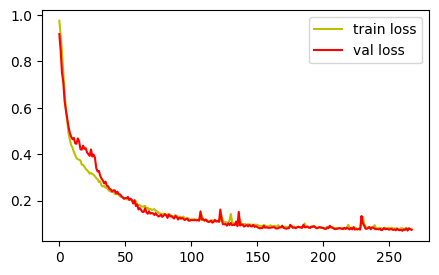

In [ ]:
#loss curve
plt.figure(figsize=(5,3))
plt.plot(history['loss'][:], 'y', label='train loss')
plt.plot(history['val_loss'][:], 'r', label='val loss')
plt.legend()

In [ ]:
pred = myMdl.predict(x_data_test)

13/13 [==============================] - 1s 3ms/step


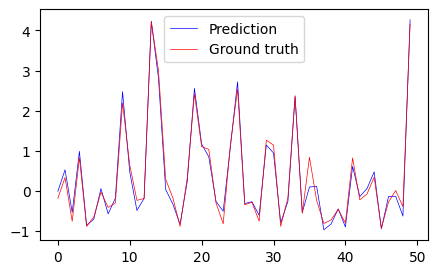

In [ ]:
# test 데이터 예측한거임 y값이 들쭉날쭉한 이유는
# test는 섞여있기 때문에 x축의 값들은 완전 날짜들이 섞여있음
# 예를들어서 6월1일, 8월 5일, 7월 3일, 7월 20일 이렇게 랜덤으로 있기 떄문에 데이터가 들쭉날쭉임
# 교수님 가이드 코드처럼 연속된 날짜를 쭉 뽑고싶었지만 그렇게까지 못함
plt.figure(figsize=(5,3))
fuck1=20
fuck2=fuck1+50
plt.plot(pred[fuck1:fuck2,-1], 'b', label='Prediction',linewidth=0.5)
plt.plot(y_data_test[fuck1:fuck2,-1], 'r', label='Ground truth',linewidth=0.5)

plt.legend()

In [ ]:
#최종 test loss는 mse는 0.0695, mae는 0.1863이 나옴
myMdl.evaluate(x_data_test,y_data_test)

13/13 [==============================] - 0s 8ms/step - loss: 0.0695 - mean_absolute_error: 0.1863


[0.06954444199800491, 0.18633542954921722]